<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK_GENAP_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama: Akhmad Ramadani

> NIM: 2041720002

> Kelas: TI-3B

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from google.colab.patches import cv_imshow

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
gradient_filename = ('/content/drive/MyDrive/Semester 6/PCVK/Images/gradient.jpg')
img_gradient = cv.imread(gradient_filename)

In [5]:
def binary_threshold(image, threshold):
  img = image.copy()
  width, height, depth = img.shape
  
  for y in range(height):
      for x in range(width):
        for z in range(depth):
          if img[x, y, z] > threshold:
              img[x, y, z] = 255
          else:
              img[x, y, z] = 0
  
  return img

In [6]:
def binary_inv_threshold(image, threshold):
  img = image.copy()
  width, height, depth = img.shape
  
  for y in range(height):
      for x in range(width):
        for z in range(depth):
          if img[x, y, z] < threshold:
              img[x, y, z] = 255
          else:
              img[x, y, z] = 0
  
  return img

In [7]:
def trunc_threshold(image, threshold):
  img = image.copy()
  width, height, depth = img.shape

  for y in range(height):
      for x in range(width):
        for z in range(depth):
          if (img[x, y, z] > threshold):
            img[x, y, z] = threshold;

  return img

In [8]:
def tozero_threshold(image, threshold):
  img = image.copy()
  width, height, depth = img.shape

  for y in range(height):
      for x in range(width):
        for z in range(depth):
          if (img[x, y, z] <= threshold):
            img[x, y, z] = 0;

  return img

In [9]:
def tozero_inv_threshold(image, threshold):
  img = image.copy()
  width, height, depth = img.shape

  for y in range(height):
      for x in range(width):
        for z in range(depth):
          if (img[x, y, z] > threshold):
            img[x, y, z] = 0;

  return img

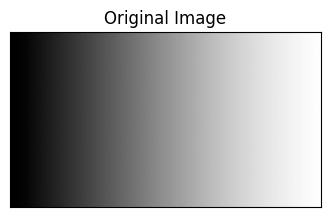

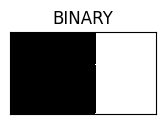

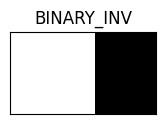

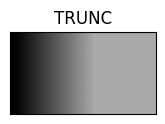

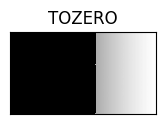

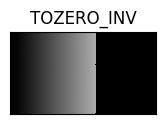

In [10]:
thresh = 170 

#1. Threshold Binary
thresh1 = binary_threshold(img_gradient, thresh)
#2. Threshold Binary Inverted
thresh2 = binary_inv_threshold(img_gradient, thresh)
#3. Threshold Truncate
thresh3 = trunc_threshold(img_gradient, thresh)
#4. Threshold Tozero
thresh4 = tozero_threshold(img_gradient, thresh)
#5. Threshold Tozero Inverse
thresh5 = tozero_inv_threshold(img_gradient, thresh)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_gradient, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
  plt.show()

In [11]:
baloon_filename = ('/content/drive/MyDrive/Semester 6/PCVK/Images/balloon.jpg')
img_baloon = cv.imread(baloon_filename)
img_baloon = cv.cvtColor(img_baloon, cv.COLOR_BGR2GRAY)
img_baloon = cv.cvtColor(img_baloon, cv.COLOR_GRAY2RGB)

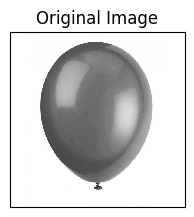

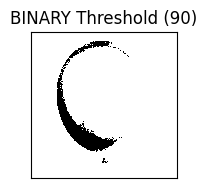

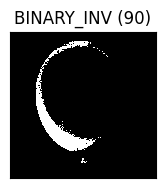

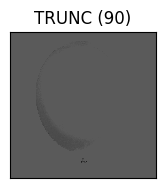

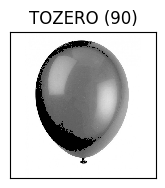

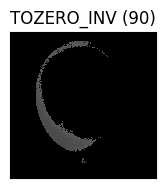

In [12]:
thresh = 90

#1. Threshold Binary
thresh1 = binary_threshold(img_baloon, thresh)
#2. Threshold Binary Inverted
thresh2 = binary_inv_threshold(img_baloon, thresh)
#3. Threshold Truncate
thresh3 = trunc_threshold(img_baloon, thresh)
#4. Threshold Tozero
thresh4 = tozero_threshold(img_baloon, thresh)
#5. Threshold Tozero Inverse
thresh5 = tozero_inv_threshold(img_baloon, thresh)

titles = ['Original Image',f'BINARY Threshold ({thresh})',f'BINARY_INV ({thresh})',f'TRUNC ({thresh})', f'TOZERO ({thresh})', f'TOZERO_INV ({thresh})']
images = [img_baloon, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
  plt.show()

In [13]:
def otsu_thresholding(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Menghitung histogram gambar
    hist = cv.calcHist([gray], [0], None, [256], [0, 256])
    
    # Normalisasi histogram
    hist /= hist.sum()
    
    # Inisialisasi variabel
    best_threshold = 0
    best_variance = 0
    
    # Loop untuk mencari threshold terbaik
    for threshold in range(256):
        # Hitung probabilitas piksel foreground
        w0 = hist[:threshold].sum()
        # Hitung probabilitas piksel background
        w1 = hist[threshold:].sum()
        
        # Hitung rata-rata intensitas piksel foreground
        u0 = np.dot(np.arange(threshold), hist[:threshold]) / w0 if w0 > 0 else 0
        # Hitung rata-rata intensitas piksel background
        u1 = np.dot(np.arange(threshold, 256), hist[threshold:]) / w1 if w1 > 0 else 0
        
        # Hitung variance between class
        variance = w0 * w1 * ((u0 - u1) ** 2)
        
        # Perbarui threshold terbaik jika variance lebih besar
        if variance > best_variance:
            best_variance = variance
            best_threshold = threshold
    
    # Gunakan threshold terbaik untuk melakukan thresholding pada gambar
    _, thresholded = cv.threshold(gray, best_threshold, 255, cv.THRESH_BINARY)
    
    return thresholded

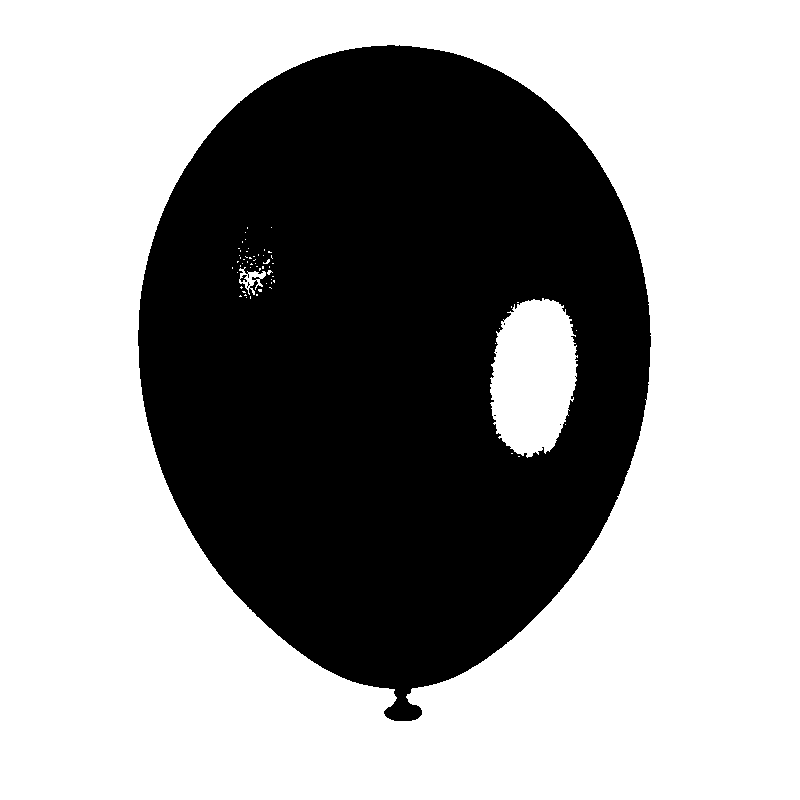

In [14]:
otsu_img = otsu_thresholding(img_baloon)

cv_imshow(otsu_img)

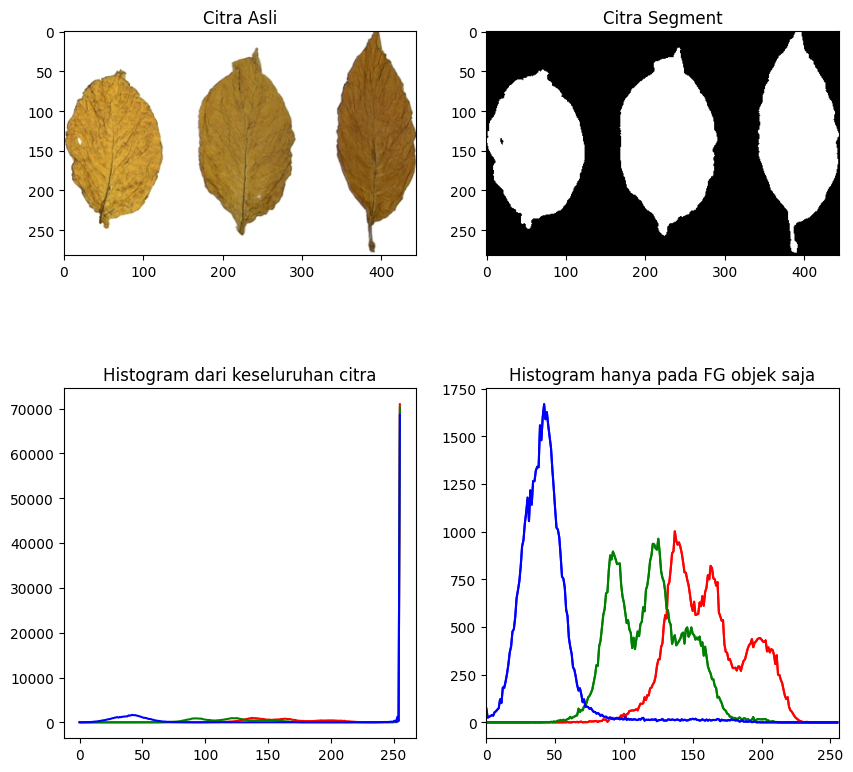

In [15]:
img_tobacco = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/tobacco.jpg') 
img_tobacco = cv.cvtColor(img_tobacco,cv.COLOR_BGR2RGB) 
img_tobacco_gray = cv.cvtColor(img_tobacco,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_tobacco_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img_tobacco) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img_tobacco],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img_tobacco],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img_tobacco],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

Text(0.5, 1.0, 'Yellow Segmented Image')

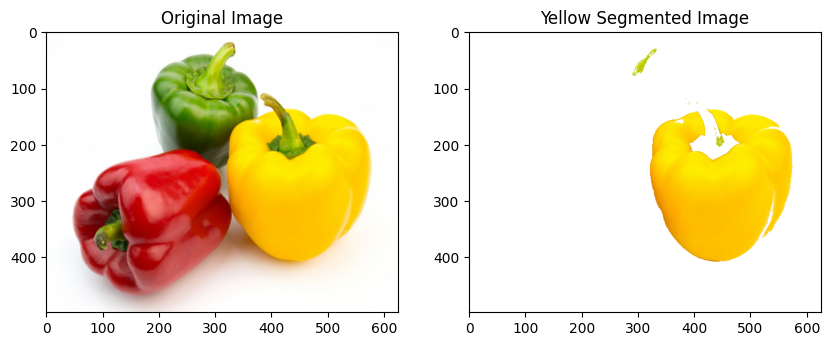

In [16]:
img_peppers = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/peppers.jpg')
img_rgb = cv.cvtColor(img_peppers, cv.COLOR_BGR2RGB)

img_float = np.float32(img_rgb.reshape((-1, 3)))

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

ret, label, center = cv.kmeans(img_float, K, None, criteria, attempts, flags)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

hsv = cv.cvtColor(res2, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100]) # batas bawah warna kuning
upper_yellow = np.array([30, 255, 255]) # batas atas warna kuning
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

background = np.zeros_like(result)
background.fill(255)

mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
result[mask_3d == 0] = background[mask_3d == 0]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(result)
plt.title('Yellow Segmented Image')

Kendala yang dialami saat menampilkan warna tertentu, adalah menentukan threshold atau batas bawah dan batas atas dari warna itu sendiri. Hal itu terjadi karena warna dari komputer yang 16 juta warna tidak mudah kita lihat dengan mata kepala sendiri. 

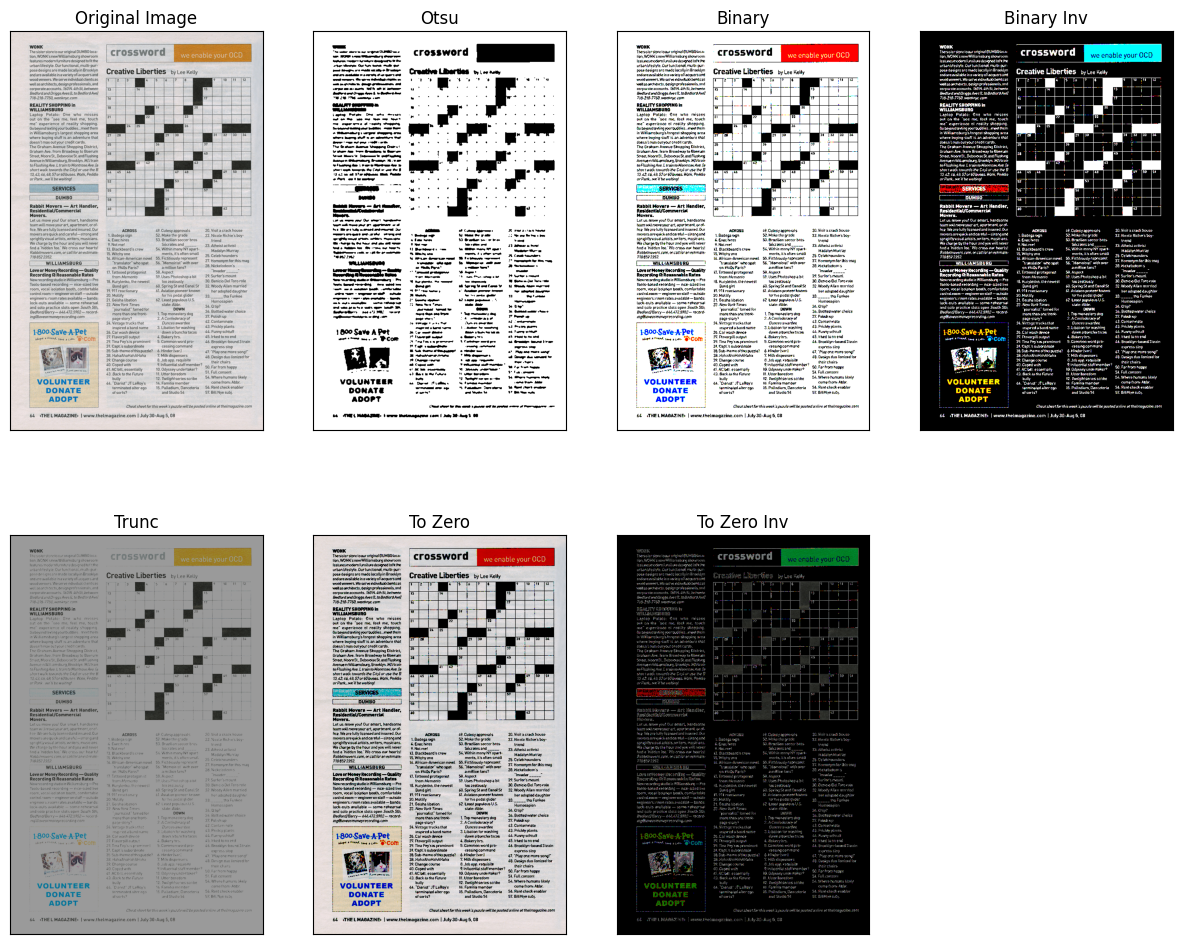

In [40]:
img_crossword = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/crossword.jpg')
img_crossword = cv.cvtColor(img_crossword, cv.COLOR_BGR2RGB)
# Apply different thresholding methods
thresh = 154
img_gray= cv.cvtColor(img_crossword, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img_gray,(5,5),0)
ret1, th1 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ret2, th2 = cv.threshold(img_crossword, thresh, 255, cv.THRESH_BINARY)
ret3, th3 = cv.threshold(img_crossword, thresh, 255, cv.THRESH_BINARY_INV)
ret4, th4 = cv.threshold(img_crossword, thresh, 255, cv.THRESH_TRUNC)
ret5, th5 = cv.threshold(img_crossword, thresh, 255, cv.THRESH_TOZERO)
ret6, th6 = cv.threshold(img_crossword, thresh, 255, cv.THRESH_TOZERO_INV)

# Display results
plt.figure(figsize=(15,12))

titles = ['Original Image', 'Otsu', 'Binary', 'Binary Inv', 'Trunc', 'To Zero', 'To Zero Inv']
images = [img_crossword, th1, th2, th3, th4, th5, th6]
threshold_values = [ret1, ret2, ret3, ret4, ret5, ret6]
best_threshold_index = threshold_values.index(max(threshold_values))
best_threshold = titles[best_threshold_index+1]

for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

     


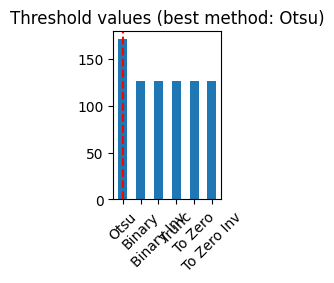

In [36]:
plt.subplot(2, 4, 8)
plt.bar(titles[1:], threshold_values, width=0.5, align='center')
plt.axvline(x=best_threshold, color='r', linestyle='--')
plt.title(f"Threshold values (best method: {best_threshold})")
plt.xticks(rotation=45)

plt.show()